## Example: Loading the daily share price data
Load `Open-High-Low-Close (OHLC)` dataset. We gathered a daily open-high-low-close `dataset` for each firm in the [S&P500](https://en.wikipedia.org/wiki/S%26P_500) since `01-03-2018`. In addition, we also downloaded data for several [Exchange traded funds (ETFs)](https://en.wikipedia.org/wiki/Exchange-traded_fund). The objective of this notebook is to load the data and explore its features.

### Setup
Let's load some packages that are required for the example by calling the `include(...)` function on our initialization file `Include.jl`:

In [69]:
include("Include.jl")

  Activating project at `~/Documents/GitHub/Covariance-Model-Study`
  No Changes to `~/Documents/GitHub/Covariance-Model-Study/Project.toml`
  No Changes to `~/Documents/GitHub/Covariance-Model-Study/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
  No Changes to `~/Documents/GitHub/Covariance-Model-Study/Project.toml`
  No Changes to `~/Documents/GitHub/Covariance-Model-Study/Manifest.toml`


## Load the data
We load the `OHLC` data using the `load(...)` command exported from the [JLD2.jl](https://github.com/JuliaIO/JLD2.jl) package. The data is returned as a `Dict{String,Any}` where the `keys` are the [ticker symbols](https://en.wikipedia.org/wiki/Ticker_symbol#:~:text=A%20ticker%20symbol%20or%20stock,on%20a%20particular%20stock%20market.) and the `values` are the `OHLC` values corresponding to that `ticker`. The data dictionary is contained in the `dataset` variable:

In [70]:
dataset = load(joinpath(_PATH_TO_DATA, "Daily-OHLC-1-3-2018-to-10-26-2023.jld2"))|> x-> x["dataset"]

Dict{String, DataFrame} with 514 entries:
  "TPR"  => 1464×8 DataFrame…
  "EMR"  => 1464×8 DataFrame…
  "CTAS" => 1464×8 DataFrame…
  "HSIC" => 1464×8 DataFrame…
  "KIM"  => 1464×8 DataFrame…
  "PLD"  => 1464×8 DataFrame…
  "IEX"  => 1464×8 DataFrame…
  "KSU"  => 994×8 DataFrame…
  "BAC"  => 1464×8 DataFrame…
  "CBOE" => 1464×8 DataFrame…
  "EXR"  => 1464×8 DataFrame…
  "NCLH" => 1464×8 DataFrame…
  "CVS"  => 1464×8 DataFrame…
  "DRI"  => 1464×8 DataFrame…
  "DTE"  => 1464×8 DataFrame…
  "ZION" => 1464×8 DataFrame…
  "AVY"  => 1464×8 DataFrame…
  "EW"   => 1464×8 DataFrame…
  "EA"   => 1464×8 DataFrame…
  "NWSA" => 1464×8 DataFrame…
  "BBWI" => 563×8 DataFrame…
  "CAG"  => 1464×8 DataFrame…
  "GPC"  => 1464×8 DataFrame…
  "FCX"  => 1464×8 DataFrame…
  "GILD" => 1464×8 DataFrame…
  ⋮      => ⋮

### Disclaimer and Risks

__This content is offered solely for training and informational purposes__. No offer or solicitation to buy or sell securities or derivative products or any investment or trading advice or strategy is made, given, or endorsed by the teaching team.

__Trading involves risk__. Carefully review your financial situation before investing in securities, futures contracts, options, or commodity interests. Past performance, whether actual or indicated by historical tests of strategies, is no guarantee of future performance or success. Trading is generally inappropriate for someone with limited resources, investment or trading experience, or a low-risk tolerance. Only risk capital that is not required for living expenses.

__You are fully responsible for any investment or trading decisions you make__. Such decisions should be based solely on evaluating your financial circumstances, investment or trading objectives, risk tolerance, and liquidity needs.

In [71]:
dataset["EA"]

Row,volume,volume_weighted_average_price,open,close,high,low,timestamp,number_of_transactions
,Float64,Float64,Float64,Float64,Float64,Float64,DateTime,Int64
1,3.21058e6,109.898,109.9,109.75,111.33,109.37,2018-01-03T05:00:00,28889
2,3.77794e6,107.674,109.87,107.19,110.55,106.67,2018-01-04T05:00:00,30061
3,5.96296e6,111.418,108.02,112.39,112.755,107.59,2018-01-05T05:00:00,50669
4,4.57908e6,113.263,113.5,113.22,114.169,111.2,2018-01-08T05:00:00,34853
5,4.11173e6,111.724,113.33,112.18,113.65,110.46,2018-01-09T05:00:00,33872
6,2.49359e6,112.069,111.5,112.25,113.3,111.286,2018-01-10T05:00:00,20787
7,2.78876e6,112.132,112.56,112.0,113.0,111.7,2018-01-11T05:00:00,20672
8,3.46737e6,113.061,110.49,113.13,113.9,110.49,2018-01-12T05:00:00,26675
9,3.57078e6,113.02,114.0,111.92,114.7,111.61,2018-01-16T05:00:00,26306


In [72]:
# CALCULATE LOG RETURN

function calculate_log_return(prices::Vector{Float64})
    returns = Float64[]
    for i in 2:length(prices)
        today_price = prices[i]
        yesterday_price = prices[i - 1]
        log_return = log(today_price / yesterday_price)
        push!(returns, log_return)
    end
    return returns
end


calculate_log_return (generic function with 1 method)

In [73]:
atvi_prices = dataset["EA"][:, "volume_weighted_average_price"]
log_returns = calculate_log_return(atvi_prices)
println("Natural Log Returns for ATVI: ", log_returns)


Natural Log Returns for ATVI: [-0.020447230194822297, 0.034176231823150424, 0.01642636091876248, -0.013681911057000892, 0.0030832143091729107, 0.0005673475584072132, 0.00824275769638498, -0.00035739466747732447, -0.0011154678463312275, 0.016319581044441565, 0.008458128183431793, 0.014727743544465682, 0.0031174933315640955, -0.01864399141473303, -0.00744763430987053, 0.0023009702245070313, 0.02077533391421696, 0.015625403701839683, 0.07357306527596616, -0.0005507163541089565, -0.01874595549132455, -0.020959732605877003, -0.011598719672663568, 0.012323242868432876, -0.031033265257814868, -0.008202224869130912, 0.03589540210761633, -0.009522158591287608, 0.015250102135458092, 0.016365620836927355, 0.002632235548057086, 0.0030831598045081665, -0.0009688961393498427, -0.012836514932599427, 0.010512085842686413, 0.016594846060075726, -0.01279727543756996, -0.012146231422098456, -0.018901871214836396, 0.009426562628623007, 0.013790556976358356, -0.008266105887635718, 0.01353529150807633, 0.01

In [74]:
using Pkg
Pkg.add("Plots")

   Resolving package versions...
  No Changes to `~/Documents/GitHub/Covariance-Model-Study/Project.toml`
  No Changes to `~/Documents/GitHub/Covariance-Model-Study/Manifest.toml`


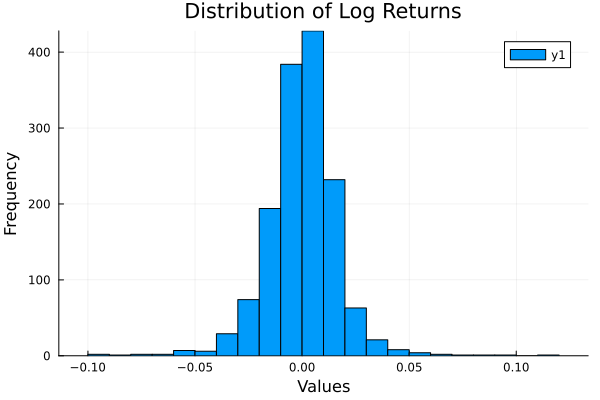

In [75]:
# PLOTTING DATA

using Plots
histogram(log_returns, bins=30, xlabel="Values", ylabel="Frequency", title="Distribution of Log Returns")


In [76]:
# CALCULATING BASIC STATS

function calculate_statistics(data::Vector{Float64})
    mean_value = mean(data)
    std_deviation = std(data)
    
    n = length(data)
    skewness = (n > 2) ? (sum((data .- mean_value) .^ 3) / (n * std_deviation^3)) : NaN
    
    return mean_value, std_deviation, skewness
end


calculate_statistics (generic function with 1 method)

Skewedness is done through "third standardized moment" which checks for asymmetry. Positive values represent the data being skewed to the right, negative values represent the data being skewed to the left.

Values close to zero are very symmetric. Moderate skewedness is between .5 and 1 in magnitude. Strong skewedness is >1

In [77]:
mean_value, std_deviation, skewness = calculate_statistics(log_returns)

println("Mean: ", mean_value)
println("Standard Deviation: ", std_deviation)
println("Skewness: ", skewness)

Mean: 8.333871740713617e-5
Standard Deviation: 0.01660463642811916
Skewness: -0.04203690514768524


Nov 17th
Objectives: test for normality/if its laplace, generate future prices, simulate multiple trajectories

In [78]:
# ANDERSON DARLING TEST FOR NORMALITY

using Statistics
using Distributions

function anderson_darling_test(data::Vector{Float64})
    n = length(data)
    sorted_data = sort(data)
    sample_mean = mean(data)
    sample_variance = var(data)

    # calc test statistic
    A2 = -n - (1/n) * sum((2i - 1) * (log(cdf(Normal(sample_mean, sqrt(sample_variance)), sorted_data[i])) + log(1 - cdf(Normal(sample_mean, sqrt(sample_variance)), sorted_data[n - i + 1]))) for i in 1:n)

    # critical values
    ad_critical_values = [0.576, 0.656, 0.787, 0.918, 1.092, 1.307, 1.557, 1.734, 1.869, 1.949, 2.015]

    # find critical value based on sample size
    k = 1
    while k <= length(ad_critical_values) && ad_critical_values[k] < A2
        k += 1
    end

    # calc p-value
    p_value = exp(1.2937 - 5.709 * k + 0.0186 * k^2)

    println("Anderson-Darling test statistic: ", A2)
    println("p-value: ", p_value)
    alpha = 0.05 # significance level

    # check if null should be rejected
    if p_value ≤ alpha
        println("The data does not follow a normal distribution (reject null hypothesis).")
    else
        println("The data follows a normal distribution (fail to reject null hypothesis).")
    end

    return A2, p_value
end

anderson_darling_test (generic function with 2 methods)

In [79]:
A2, p_value = anderson_darling_test(log_returns)

Anderson-Darling test statistic: 14.041253175665588
p-value: 9.384577935904261e-29
The data does not follow a normal distribution (reject null hypothesis).


(14.041253175665588, 9.384577935904261e-29)

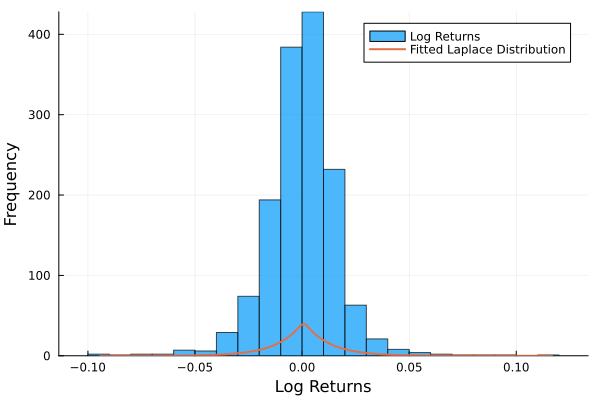

In [80]:
using Distributions
using Plots

# fit to laplace
laplace_fit = fit_mle(Laplace, log_returns)

# plot histogram of log returns
histogram(log_returns, bins=30, label="Log Returns", xlabel="Log Returns", ylabel="Frequency", alpha=0.7)

# plot fitted distribution
x = range(minimum(log_returns), maximum(log_returns), length=100)
plot!(x, pdf.(laplace_fit, x), label="Fitted Laplace Distribution", linewidth=2)
plot!()

In [86]:
# GENERATE FUTURE PRICES

function generate_future_prices(starting_price, dist::Distribution, num_days::Int, log_returns::Vector{Float64})
    prices = [starting_price]
    for _ in 1:num_days
        log_return = log_returns
        new_price = prices[end] * exp(log_return)
        push!(prices, new_price)
    end
    return prices[2:end]  # exclude initial price
end

generate_future_prices (generic function with 2 methods)

In [91]:
median_log_return = median(log_returns)
volatility = std(log_returns)


println(generate_future_prices(atvi_prices[end], Laplace(median_log_return, volatility), 1))


[124.12913875134666]


In [94]:
function simulate_trajectories(starting_price, dist::Distribution, num_days::Int, num_trajectories::Int)
    trajectories = []
    for _ in 1:num_trajectories
        trajectory = generate_future_prices(starting_price, dist, num_days)
        push!(trajectories, trajectory)
    end
    return trajectories
end


simulate_trajectories (generic function with 1 method)

Any[[117.90353200008325, 120.73363090878219, 120.41869475406422, 122.61615265097605, 123.29332567291073, 122.55460009321969, 123.62648883016081, 124.06441318336064, 119.58754091858611, 119.70374768758597, 120.27370863593269, 120.41688415933399, 121.91956967328021, 121.50994674515118, 127.7185605609512, 128.41260783080767, 128.5955229712669, 127.01734231505755, 124.90202298582135, 130.64831846414737, 136.03118641152707, 130.55252051754547, 126.83256674213526, 123.66979396826096, 125.70905548395604, 124.74966489625157, 126.56877926247029, 125.48046968686671, 124.56964369282473, 128.08925425187573, 127.28726236636282, 119.26073860072026, 117.57438839955654, 118.7747984703406, 118.15869519822509, 118.76826420164366, 120.75808704390397, 116.2299929166018, 115.94339125568766, 106.15378758967097, 106.30489393984288, 109.42623189435746, 108.2069933476915, 105.53478286511285, 107.64435047652545, 104.77953208939479, 101.7910005076111, 102.9481526393635, 104.4367914581324, 105.4716842109076, 106.

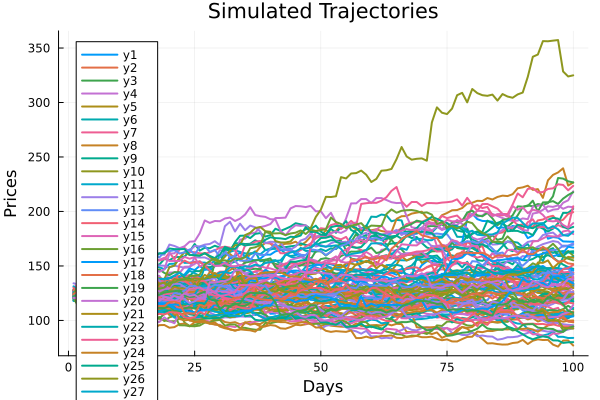

In [107]:
num_days = 100
num_trajectories = 100

trajectories = simulate_trajectories(atvi_prices[end], Laplace(median_log_return, volatility), num_days, num_trajectories)
println(trajectories)

plot()
for trajectory in trajectories
    plot!(1:num_days, trajectory, linewidth=2, label="Trajectory")
end

xlabel!("Days")
ylabel!("Prices")
title!("Simulated Trajectories")
